## Assignment 3

In [8]:
import pandas as pd
from datetime import datetime

# -----------------------------
# Step 1: Load datasets
# -----------------------------
customers = pd.read_csv("AWCustomers.csv")
sales = pd.read_csv("AWSales.csv")

# -----------------------------
# Step 2: Merge BikeBuyer info
# -----------------------------
df_merged = pd.merge(customers, sales[['CustomerID', 'BikeBuyer']], 
                     on='CustomerID', how='left')
df_merged['BikeBuyer'] = df_merged['BikeBuyer'].fillna(0).astype(int)

# -----------------------------
# Step 3: Calculate Age from BirthDate
# -----------------------------
df_merged['BirthDate'] = pd.to_datetime(df_merged['BirthDate'])
today = pd.to_datetime('today')
df_merged['Age'] = (today - df_merged['BirthDate']).dt.days // 365

# -----------------------------
# Step 4: Select relevant features
# -----------------------------
selected_features = ["CustomerID", "BikeBuyer", "YearlyIncome", "Age",
                     "MaritalStatus", "Education", "Gender", 
                     "NumberCarsOwned", "TotalChildren"]

df_selected = df_merged[selected_features]

# -----------------------------
# Step 5: Save prepared dataset
# -----------------------------
df_selected.to_csv("AdventureWorks_prepared.csv", index=False)
print("Prepared dataset saved as 'AdventureWorks_prepared.csv'")
print(df_selected.head())


Prepared dataset saved as 'AdventureWorks_prepared.csv'
   CustomerID  BikeBuyer  YearlyIncome  Age MaritalStatus        Education  \
0       21173          1         81916   38             M        Bachelors   
1       13249          1         81076   53             M  Partial College   
2       29350          1         86387   40             S        Bachelors   
3       13503          1         61481   48             M  Partial College   
4       22803          1         51804   50             S  Partial College   

  Gender  NumberCarsOwned  TotalChildren  
0      M                3              1  
1      M                2              2  
2      F                3              0  
3      M                2              2  
4      M                1              0  


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Load prepared dataset
df = pd.read_csv("AdventureWorks_prepared.csv")  # c. Load the cleaned AdventureWorks dataset
print("Dataset preview:\n", df.head())  # c. Display first few rows of the dataset

# Q1: Feature Analysis & Data Types
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        dtype = "Continuous/Discrete (Interval/Ratio)"  # c. Numeric attribute
    else:
        dtype = "Categorical (Nominal/Ordinal)"         # c. Categorical attribute
    print(f"{col}: {dtype}")  # c. Print column name with its data type



Dataset preview:
    CustomerID  BikeBuyer  YearlyIncome  Age MaritalStatus        Education  \
0       21173          1         81916   38             M        Bachelors   
1       13249          1         81076   53             M  Partial College   
2       29350          1         86387   40             S        Bachelors   
3       13503          1         61481   48             M  Partial College   
4       22803          1         51804   50             S  Partial College   

  Gender  NumberCarsOwned  TotalChildren  
0      M                3              1  
1      M                2              2  
2      F                3              0  
3      M                2              2  
4      M                1              0  
CustomerID: Continuous/Discrete (Interval/Ratio)
BikeBuyer: Continuous/Discrete (Interval/Ratio)
YearlyIncome: Continuous/Discrete (Interval/Ratio)
Age: Continuous/Discrete (Interval/Ratio)
MaritalStatus: Categorical (Nominal/Ordinal)
Education: Categoric

In [18]:
# Q2: Compare average income of bike buyers vs non-buyers
income_buyers = df[df['BikeBuyer']==1]['YearlyIncome']  # c. Extract YearlyIncome for bike buyers
income_nonbuyers = df[df['BikeBuyer']==0]['YearlyIncome']  # c. Extract YearlyIncome for non-buyers
t_stat, p_val = ttest_ind(income_buyers, income_nonbuyers, equal_var=False)  # c. Perform t-test
print(f"Bike buyers mean income: {income_buyers.mean():.2f}")  # c. Mean income of buyers
print(f"Non-buyers mean income: {income_nonbuyers.mean():.2f}")  # c. Mean income of non-buyers
print(f"T-test p-value: {p_val:.4f}")  # c. p-value of t-test


Bike buyers mean income: 79653.97
Non-buyers mean income: 64261.99
T-test p-value: 0.0000


In [17]:

# Q3: Percentage of buyers by MaritalStatus
commute_table = pd.crosstab(df['MaritalStatus'], df['BikeBuyer'])  # c. Create contingency table
commute_percent = commute_table.div(commute_table.sum(axis=1), axis=0) * 100  # c. Convert to percentage
print(commute_percent)  # c. Display percentage table


BikeBuyer              0          1
MaritalStatus                      
M              36.161657  63.838343
S              55.062990  44.937010


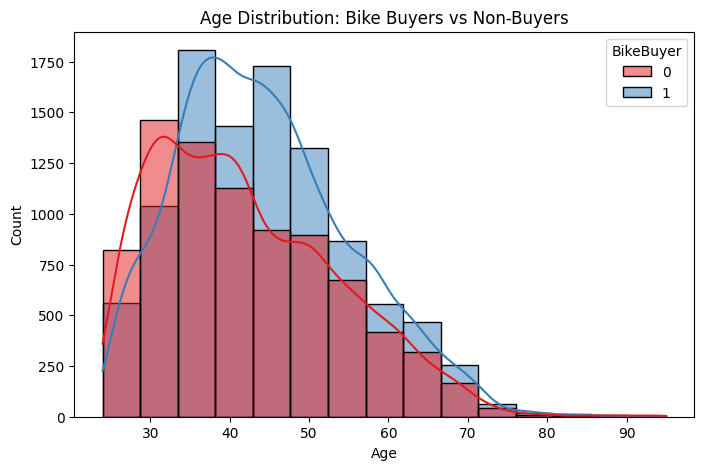

In [14]:

# Q4: Age distribution by BikeBuyer
plt.figure(figsize=(8,5))  # c. Set figure size
sns.histplot(data=df, x='Age', hue='BikeBuyer', bins=15, kde=True, palette='Set1')  # c. Plot histogram of Age by BikeBuyer
plt.title("Age Distribution: Bike Buyers vs Non-Buyers")  # c. Set plot title
plt.xlabel("Age")  # c. Set X-axis label
plt.ylabel("Count")  # c. Set Y-axis label
plt.show()  # c. Display plot


In [16]:

# Q5: BikeBuyer proportion by MaritalStatus
contingency = pd.crosstab(df['MaritalStatus'], df['BikeBuyer'])  # c. Create contingency table for chi-square test
chi2, p, dof, ex = chi2_contingency(contingency)  # c. Perform chi-square test
print(f"Chi2 statistic: {chi2:.2f}, p-value: {p:.4f}")  # c. Display chi-square statistic and p-value
if p < 0.05:
    print("Significant difference in BikeBuyer proportion across marital status categories")  # c. Interpretation if p < 0.05
else:
    print("No significant difference in BikeBuyer proportion across marital status categories")  # c. Interpretation if p >= 0.05


Chi2 statistic: 657.69, p-value: 0.0000
Significant difference in BikeBuyer proportion across marital status categories
